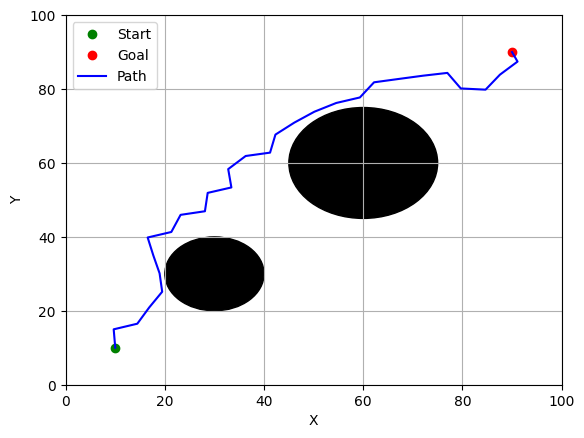

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random

class Node:
    def __init__(self, position, parent=None):
        self.position = position
        self.parent = parent

def rrt(start, goal, bounds, obstacles, max_iterations, step_size):
    tree = [Node(start)]
    
    for _ in range(max_iterations):
        rand_point = generate_random_point(bounds)
        nearest_node = find_nearest_node(tree, rand_point)
        new_point = extend(nearest_node.position, rand_point, step_size)
        
        if not check_collision(nearest_node.position, new_point, obstacles):
            new_node = Node(new_point, nearest_node)
            tree.append(new_node)
            
            if distance(new_point, goal) < step_size:
                goal_node = Node(goal, new_node)
                tree.append(goal_node)
                return extract_path(goal_node)
    
    return None

def generate_random_point(bounds):
    """Generate a random point within the bounds."""
    x_min, x_max, y_min, y_max = bounds
    return (random.uniform(x_min, x_max), random.uniform(y_min, y_max))

def find_nearest_node(tree, point):
    """Find the node in the tree closest to the given point."""
    nearest_node = min(tree, key=lambda node: distance(node.position, point))
    return nearest_node

def extend(from_point, to_point, step_size):
    """Create a new point by moving from from_point towards to_point by step_size."""
    direction = np.array(to_point) - np.array(from_point)
    length = np.linalg.norm(direction)
    if length > step_size:
        direction = direction / length
        new_point = np.array(from_point) + direction * step_size
        return tuple(new_point)
    else:
        return to_point

    
def check_collision(start_point, end_point, obstacles):
    """Check if the path from start_point to end_point collides with any obstacles."""
    for obs in obstacles:
        obs_center = np.array(obs['center'])
        obs_radius = obs['radius']
        line_start = np.array(start_point)
        line_end = np.array(end_point)
        
        # Closest point on line segment to obstacle center
        line_vec = line_end - line_start
        line_len = np.linalg.norm(line_vec)
        line_vec_normalized = line_vec / line_len
        to_obs_vec = obs_center - line_start
        projection = np.dot(to_obs_vec, line_vec_normalized)
        projection = np.clip(projection, 0, line_len)
        closest_point = line_start + projection * line_vec_normalized
        
        # Check if the distance from the obstacle center to the closest point is less than the radius
        distance_to_closest_point = np.linalg.norm(obs_center - closest_point)
        if distance_to_closest_point < obs_radius:
            return True
    
    return False

def distance(point1, point2):
    """Calculate the Euclidean distance between two points."""
    return np.linalg.norm(np.array(point1) - np.array(point2))

def extract_path(goal_node):
    """Backtrack from the goal_node to the start node to extract the path."""
    path = []
    node = goal_node
    while node:
        path.append(node.position)
        node = node.parent
    return path[::-1]  # Return reversed path

def plot_environment(obstacles, start, goal, path=None):
    """Visualize the environment, obstacles, start, goal, and path."""
    plt.figure()
    
    # Plot obstacles
    for obs in obstacles:
        circle = plt.Circle(obs['center'], obs['radius'], color='black')
        plt.gca().add_patch(circle)
    
    # Plot start and goal
    plt.plot(start[0], start[1], 'go', label='Start')
    plt.plot(goal[0], goal[1], 'ro', label='Goal')
    
    # Plot path
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', label='Path')
    
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define your obstacles
obstacles = [{'center': (30, 30), 'radius': 10}, {'center': (60, 60), 'radius': 15}]

# Define start and goal
start = (10, 10)
goal = (90, 90)

# Run the RRT algorithm
path = rrt(start, goal, bounds=(0, 100, 0, 100), obstacles=obstacles, max_iterations=1000, step_size=5)

# Visualize the result
plot_environment(obstacles, start, goal, path)

    

